In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np
sns.set()

In [2]:
df = pd.read_csv('finance.csv')
df.head()

,year,layouta,layoutb,layoutc
0,0,250000,250000,250000
1,1,30000,50000,20000
2,2,30000,45000,25000
3,3,30000,35000,30000
4,4,30000,30000,35000


In [3]:
print('layout A revenue:', ((df.layouta.iloc[1:].sum() - df.layouta.iloc[0]) / 12))
print('layout A ROI:', (((df.layouta.iloc[1:].sum() - df.layouta.iloc[0]) / 12) * 100) / df.layouta.iloc[0])

layout A revenue: 5833.33333333
layout A ROI: 2.33333333333


In [4]:
cost = df.layouta.iloc[0].copy()
copy_month = df.layouta.iloc[1:].values / 30.0
for i in range(df.layouta.iloc[1:].shape[0]):
    for k in range(30):
        cost = cost - copy_month[i]
        if cost <= 0:
            print('month:', i, 'day:',k)
            break

month: 8 day: 23
month: 9 day: 0
month: 10 day: 0
month: 11 day: 0


So our payback A period is on 8th month, 23rd day

In [5]:
print('layout B revenue:', ((df.layoutb.iloc[1:].sum() - df.layoutb.iloc[0]) / 12))
print('layout B ROI:', (((df.layoutb.iloc[1:].sum() - df.layoutb.iloc[0]) / 12) * 100) / df.layoutb.iloc[0])

layout B revenue: 3750.0
layout B ROI: 1.5


In [6]:
cost = df.layoutb.iloc[0].copy()
copy_month = df.layoutb.iloc[1:].values / 30.0
for i in range(df.layoutb.iloc[1:].shape[0]):
    for k in range(30):
        cost = cost - copy_month[i]
        if cost <= 0:
            print('month:', i, 'day:',k)
            break

month: 8 day: 10
month: 9 day: 0
month: 10 day: 0
month: 11 day: 0


So our payback B period is on 8th month, 10th day

In [7]:
print('layout C revenue:', ((df.layoutc.iloc[1:].sum() - df.layoutc.iloc[0]) / 12))
print('layout C ROI:', (((df.layoutc.iloc[1:].sum() - df.layoutc.iloc[0]) / 12) * 100) / df.layoutc.iloc[0])

layout C revenue: 4583.33333333
layout C ROI: 1.83333333333


In [8]:
cost = df.layoutc.iloc[0].copy()
copy_month = df.layoutc.iloc[1:].values / 30.0
for i in range(df.layoutc.iloc[1:].shape[0]):
    for k in range(30):
        cost = cost - copy_month[i]
        if cost <= 0:
            print('month:', i, 'day:',k)
            break

month: 9 day: 7
month: 10 day: 0
month: 11 day: 0


So our payback C period is on 9th month, 7th day

layout A NPV  10.0 %: 228415.300335
layout A NPV  15.0 %: 201586.871869
layout A NPV  20.0 %: 181978.913566
layout A NPV  25.0 %: 167362.622208


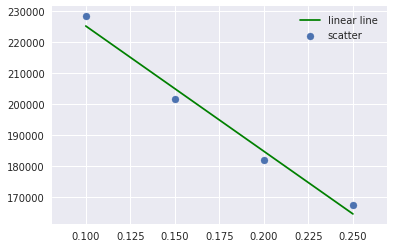

In [9]:
ratios = [0.1, 0.15, 0.2, 0.25]
yval = []
for i in ratios:
    yval.append(np.npv(i, df.layouta.iloc[1:]) * (1 + i))
    print('layout A NPV ', i * 100 , '%:', yval[-1])
    
regr = linear_model.LinearRegression().fit(np.array([ratios]).T, np.array([yval]).T)
y_pred = regr.predict(np.array([ratios]).T)
plt.scatter(ratios, yval, label = 'scatter')
plt.plot(ratios, y_pred[:, 0], c = 'g', label = 'linear line')
plt.legend()
plt.show()

layout B NPV  10.0 %: 236146.703621
layout B NPV  15.0 %: 218636.331611
layout B NPV  20.0 %: 205812.808966
layout B NPV  25.0 %: 196303.989504


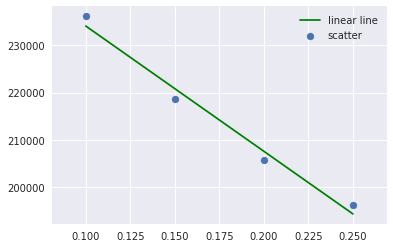

In [11]:
ratios = [0.1, 0.15, 0.2, 0.25]
yval = []
for i in ratios:
    yval.append(np.npv(i, df.layoutb.iloc[1:]) * (1 + i))
    print('layout B NPV ', i * 100 , '%:', yval[-1])
    
regr = linear_model.LinearRegression().fit(np.array([ratios]).T, np.array([yval]).T)
y_pred = regr.predict(np.array([ratios]).T)
plt.scatter(ratios, yval, label = 'scatter')
plt.plot(ratios, y_pred[:, 0], c = 'g', label = 'linear line')
plt.legend()
plt.show()

layout C NPV  10.0 %: 215688.015218
layout C NPV  15.0 %: 188965.222996
layout C NPV  20.0 %: 169121.303851
layout C NPV  25.0 %: 154062.865408


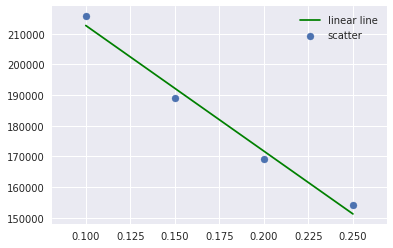

In [12]:
ratios = [0.1, 0.15, 0.2, 0.25]
yval = []
for i in ratios:
    yval.append(np.npv(i, df.layoutc.iloc[1:]) * (1 + i))
    print('layout C NPV ', i * 100 , '%:', yval[-1])
    
regr = linear_model.LinearRegression().fit(np.array([ratios]).T, np.array([yval]).T)
y_pred = regr.predict(np.array([ratios]).T)
plt.scatter(ratios, yval, label = 'scatter')
plt.plot(ratios, y_pred[:, 0], c = 'g', label = 'linear line')
plt.legend()
plt.show()